<a href="https://colab.research.google.com/github/Joseph-Manahan/HeartDiseaseModel/blob/main/Copy_of_CSC_308_Final_Project_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Load and import

In [ ]:
# Importing the dataset.
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
10. thalch: maximum heart rate achieved
11. exang: exercise-induced angina (True/ False)
12. oldpeak: ST depression induced by exercise relative to rest
13. slope: the slope of the peak exercise ST segment
14. ca: number of major vessels (0-3) colored by fluoroscopy
15. thal: [normal; fixed defect; reversible defect]
16. num: the predicted attribute

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from xgboost import plot_tree
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from tensorflow import keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.14.0


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final/dataset/heart_disease_uci.csv')
print(df.shape)
print(df.columns)
df.head()

(920, 16)
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Data exploration

In [ ]:
print('Cleveland dataset\n', df[df['dataset'] == 'Cleveland'].count())
print('\nHungary dataset\n', df[df.dataset == 'Hungary'].count())
print('\nSwitzerland dataset\n', df[df.dataset == 'Switzerland'].count())
print('\nVA Long Beach dataset\n', df[df.dataset == 'VA Long Beach'].count())

Cleveland dataset
 id          304
age         304
sex         304
dataset     304
cp          304
trestbps    304
chol        304
fbs         304
restecg     304
thalch      304
exang       304
oldpeak     304
slope       303
ca          299
thal        301
num         304
dtype: int64

Hungary dataset
 id          293
age         293
sex         293
dataset     293
cp          293
trestbps    292
chol        270
fbs         285
restecg     292
thalch      292
exang       292
oldpeak     293
slope       104
ca            3
thal         28
num         293
dtype: int64

Switzerland dataset
 id          123
age         123
sex         123
dataset     123
cp          123
trestbps    121
chol        123
fbs          48
restecg     122
thalch      122
exang       122
oldpeak     117
slope       106
ca            5
thal         71
num         123
dtype: int64

VA Long Beach dataset
 id          200
age         200
sex         200
dataset     200
cp          200
trestbps    144
chol        19

In [ ]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


We can end up dropping the dataset when creating the training, validation and test.

But we should create 4 datasets, that consists of only these 4 locations. We drop it after we clean the data for missing values

In [ ]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Now we want to see what is being calculated as NA, which dataset is incomplete and how we would adapt that data since the data.

It is interesting to see that a majority of missing data is in every dataset except the Cleveland dataset. How important are ca and thal? The number of missing values is too large since our dataset only consists of 920 rows. We can't use numerical means to fill those columns in. For everything else it is reasonable, to either backfill for categorical values, and using the mean for numerical values.

## Cleaning the data

### dropping columns

In [ ]:
df_cleaned = df.drop(['slope', 'ca', 'thal','id'], axis=1)
df_cleaned.shape

(920, 12)

### missing values

In [ ]:
# Categorical cleaning.
df_cleaned['restecg'].fillna(method='bfill', inplace=True)
df_cleaned['fbs'].fillna(method='bfill', inplace=True)
df_cleaned['exang'].fillna(method='bfill', inplace=True)

In [ ]:
# Numerical cleaning
df_cleaned['thalch'] = df_cleaned['thalch'].fillna(df_cleaned['thalch'].mean())
df_cleaned['oldpeak'] = df_cleaned['oldpeak'].fillna(df_cleaned['oldpeak'].mean())
df_cleaned['trestbps'] = df_cleaned['trestbps'].fillna(df_cleaned['trestbps'].mean())
df_cleaned['chol'] = df_cleaned['chol'].fillna(df_cleaned['trestbps'].mean())

In [ ]:
df_cleaned.isna().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

### One-hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_cleaned['cp_encoded'] = label_encoder.fit_transform(df_cleaned['cp'])
cp_classes = label_encoder.classes_
df_cleaned['restecg_encoded'] = label_encoder.fit_transform(df_cleaned['restecg'])
restecg_classes = label_encoder.classes_
df_cleaned.drop(['cp','restecg'], axis=1, inplace=True)

df_cleaned = pd.get_dummies(df_cleaned, columns=['dataset', 'fbs', 'exang','sex'])

df_cleaned.head()

,age,trestbps,chol,thalch,oldpeak,num,cp_encoded,restecg_encoded,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,fbs_False,fbs_True,exang_False,exang_True,sex_Female,sex_Male
0,63,145.0,233.0,150.0,2.3,0,3,0,1,0,0,0,0,1,1,0,0,1
1,67,160.0,286.0,108.0,1.5,2,0,0,1,0,0,0,1,0,0,1,0,1
2,67,120.0,229.0,129.0,2.6,1,0,0,1,0,0,0,1,0,0,1,0,1
3,37,130.0,250.0,187.0,3.5,0,2,1,1,0,0,0,1,0,1,0,0,1
4,41,130.0,204.0,172.0,1.4,0,1,0,1,0,0,0,1,0,1,0,1,0


In [ ]:
print(cp_classes)
print(restecg_classes)
  #       0               1               2               3
# ['asymptomatic' 'atypical angina' 'non-anginal' 'typical angina']
  #       0             1             2
# ['lv hypertrophy' 'normal' 'st-t abnormality']

['asymptomatic' 'atypical angina' 'non-anginal' 'typical angina']
['lv hypertrophy' 'normal' 'st-t abnormality']


In [ ]:
# Checking to ensure everything is a numerical data type. Could have done this using code but since we don't have that many columns we can just check visually.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    920 non-null    int64  
 1   trestbps               920 non-null    float64
 2   chol                   920 non-null    float64
 3   thalch                 920 non-null    float64
 4   oldpeak                920 non-null    float64
 5   num                    920 non-null    int64  
 6   cp_encoded             920 non-null    int64  
 7   restecg_encoded        920 non-null    int64  
 8   dataset_Cleveland      920 non-null    uint8  
 9   dataset_Hungary        920 non-null    uint8  
 10  dataset_Switzerland    920 non-null    uint8  
 11  dataset_VA Long Beach  920 non-null    uint8  
 12  fbs_False              920 non-null    uint8  
 13  fbs_True               920 non-null    uint8  
 14  exang_False            920 non-null    uint8  
 15  exang_

Now that the data is cleaned we need to split the data into train, validation and test.

### Resampling

In [ ]:
target_class_to_upsample = 4

class_to_upsample = df_cleaned[df_cleaned["num"] == target_class_to_upsample]
other_classes = df_cleaned[df_cleaned["num"] != target_class_to_upsample]

upsampled_class = resample(class_to_upsample, replace=True, n_samples=100, random_state=42)

upsampled_df = pd.concat([upsampled_class, other_classes])

upsampled_df = upsampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
upsampled_df['num'].value_counts()

0    411
1    265
2    109
3    107
4    100
Name: num, dtype: int64

In [ ]:
df_cleaned['num'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

## Splitting the dataset

In [ ]:
train_dataset = upsampled_df.sample(frac=0.7, random_state=0) # 70% training

test_dataset = upsampled_df.drop(train_dataset.index)    # rest of the training as test data -> 30%
validation_dataset = train_dataset.sample(frac=0.15,random_state=0)    # 15% validation
train_dataset = train_dataset.drop(validation_dataset.index)  #ensures training doesn't include the validation

labels = upsampled_df["num"]    # target
features = upsampled_df.drop(columns=['num'])


# selecting features to train(log regression)
log_train_features = train_dataset[['age', 'trestbps', 'oldpeak']] # 'chol' is not included
log_test_features = train_dataset[['age', 'trestbps', 'oldpeak']]
log_train_labels = train_dataset["num"]
log_test_labels = train_dataset["num"]


# RF splitting data
RF_features_train, RF_features_test, RF_labels_train, RF_labels_test = train_test_split(features, labels, test_size=0.3, random_state= 0) # 70% training and 30% test

# GBT splitting data
GBT_features_train, GBT_features_test, GBT_labels_train, GBT_labels_test = train_test_split(features, labels, test_size=0.3, random_state=0)

ValueError: ignored

In [ ]:
train_dataset['num'].value_counts()

0    252
1    150
3     68
2     61
4     59
Name: num, dtype: int64

## Normalization


In [ ]:
features.describe().transpose()[['mean', 'std']]

,mean,std
age,53.850806,9.379106
trestbps,132.819426,18.717106
chol,195.156489,109.590677
thalch,136.520357,25.121126
oldpeak,0.968044,1.112259
cp_encoded,0.754032,0.954031
restecg_encoded,0.972782,0.649664
dataset_Cleveland,0.335685,0.472468
dataset_Hungary,0.295363,0.456436
dataset_Switzerland,0.137097,0.344123


In [ ]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(features))
print(normalizer.mean.numpy())

[[5.3850800e+01 1.3281943e+02 1.9515646e+02 1.3652037e+02 9.6804434e-01
  7.5403208e-01 9.7278214e-01 3.3568543e-01 2.9536289e-01 1.3709675e-01
  2.3185483e-01 8.3266127e-01 1.6733870e-01 5.7762092e-01 4.2237902e-01
  1.9959675e-01 8.0040312e-01]]


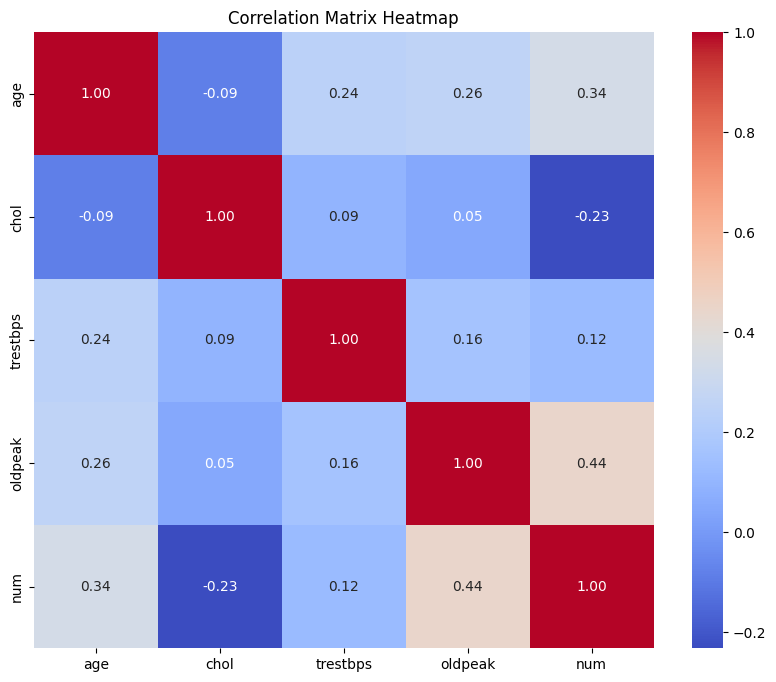

In [ ]:
features_analysis=['age','chol', 'trestbps', 'oldpeak', 'num']
for i in features_analysis:
    df[i] = pd.to_numeric(df[i], errors='coerce')

subset_data = df[features_analysis]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
pred_dataset = df_cleaned.drop('num',axis=1)
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(pred_dataset)
labels = df_cleaned['num']

# Data Training

## Logistic Regression

### One variable

In [ ]:
one_feature = np.array(log_train_features['oldpeak']) # 'oldpeak' -> highest correlation to target

one_feature_normalizer = preprocessing.Normalization(input_shape=[1, ], axis=None)
one_feature_normalizer.adapt(one_feature)

sequential model

In [ ]:
nb_classes = 5   # 0,1,2,3,4

number_of_features = 1
one_feature_model = tf.keras.Sequential([
    one_feature_normalizer
])

train_lables_in_classes = to_categorical(log_train_labels,nb_classes )

one_feature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
Total params: 3 (16.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
one_feature_model.add(Dense(nb_classes,activation = 'softmax',input_dim = number_of_features))
one_feature_model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

one_feature_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 5)                 10        
                                                                 
Total params: 13 (56.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = one_feature_model.fit(
    log_train_features['oldpeak'], train_lables_in_classes,
    epochs=35, batch_size=4,
    verbose=1,
    validation_split = 0.20
    )

Epoch 1/35
118/118 [==============================] - 1s 5ms/step - loss: 1.8594 - accuracy: 0.2140 - val_loss: 1.7917 - val_accuracy: 0.2542
Epoch 2/35
118/118 [==============================] - 0s 3ms/step - loss: 1.7847 - accuracy: 0.2161 - val_loss: 1.7282 - val_accuracy: 0.2712
Epoch 3/35
118/118 [==============================] - 0s 3ms/step - loss: 1.7160 - accuracy: 0.2288 - val_loss: 1.6714 - val_accuracy: 0.2797
Epoch 4/35
118/118 [==============================] - 0s 3ms/step - loss: 1.6540 - accuracy: 0.2288 - val_loss: 1.6205 - val_accuracy: 0.2797
Epoch 5/35
118/118 [==============================] - 0s 2ms/step - loss: 1.5984 - accuracy: 0.2331 - val_loss: 1.5775 - val_accuracy: 0.2966
Epoch 6/35
118/118 [==============================] - 0s 3ms/step - loss: 1.5502 - accuracy: 0.2267 - val_loss: 1.5392 - val_accuracy: 0.2966
Epoch 7/35
118/118 [==============================] - 0s 2ms/step - loss: 1.5088 - accuracy: 0.2331 - val_loss: 1.5087 - val_accuracy: 0.2966
Epoch 

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0.25, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [num]')
  plt.legend()
  plt.grid(True)


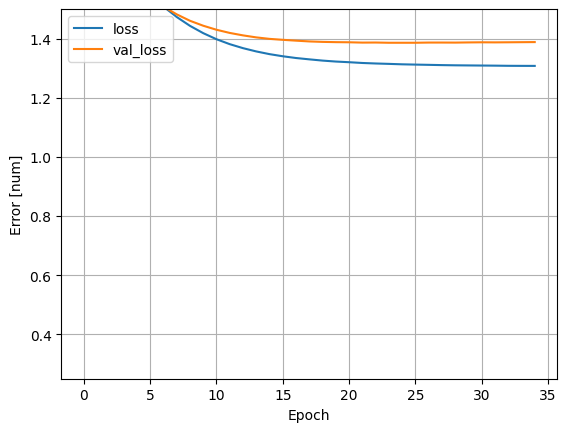

In [ ]:
plot_loss(history)

In [ ]:
test_results = {}
test_lables_in_classes = to_categorical(log_test_labels,nb_classes )

test_results['oldpeak_model'] = one_feature_model.evaluate(
    log_test_features['oldpeak'],
    test_lables_in_classes , verbose=1)

19/19 [==============================] - 0s 3ms/step - loss: 1.3233 - accuracy: 0.4661


In [ ]:
test_pred = one_feature_model.predict(log_test_features['oldpeak'])
preds_classes = np.argmax(test_pred, axis=-1)
preds_classes

19/19 [==============================] - 0s 3ms/step


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 1, 0, 1, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 4, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 1, 4, 0, 0, 1, 0, 4, 0, 0, 0, 4, 0,
       0, 4, 0, 4, 0, 0, 4, 0, 0, 1, 0, 0, 1, 1, 1, 0, 4, 0, 0, 0, 1, 0,
       0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0,
       0, 4, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 4, 0, 0,

In [ ]:
le = LabelEncoder()
y_true_encoded = le.fit_transform(log_test_labels)
y_pred_encoded = le.transform(preds_classes)

In [ ]:
cm = confusion_matrix(y_true_encoded, y_pred_encoded)

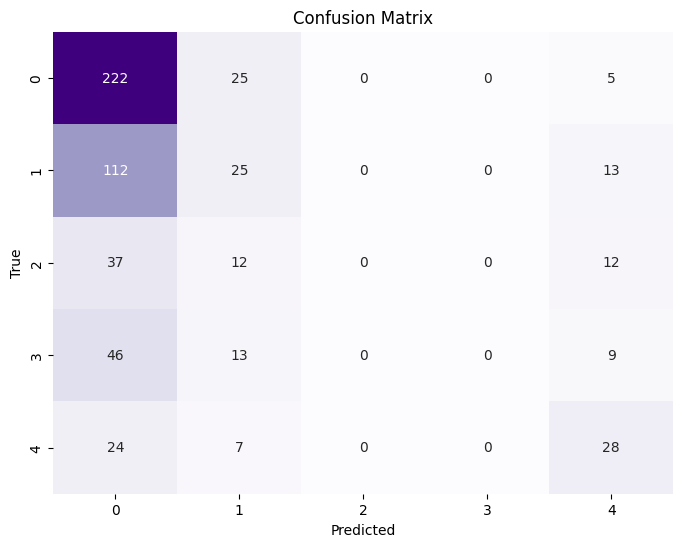

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(log_test_labels, y_pred_encoded))


              precision    recall  f1-score   support

           0       0.50      0.88      0.64       252
           1       0.30      0.17      0.22       150
           2       0.00      0.00      0.00        61
           3       0.00      0.00      0.00        68
           4       0.42      0.47      0.44        59

    accuracy                           0.47       590
   macro avg       0.25      0.30      0.26       590
weighted avg       0.33      0.47      0.37       590



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Multiple variables

In [ ]:
two_feature = np.array(log_train_features['oldpeak'],log_train_features['age'])
two_feature_normalizer = preprocessing.Normalization(input_shape=[2,], axis=None)
two_feature_normalizer.adapt(two_feature)

In [ ]:
nb_classes = 5   # 0,1,2,3,4

two_feature_model = tf.keras.Sequential([
    two_feature_normalizer
])

number_of_features = 2
train_lables_in_classes = to_categorical(log_train_labels,nb_classes )

two_feature_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
Total params: 3 (16.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
two_feature_model.add(Dense(nb_classes,activation = 'softmax',input_dim = number_of_features))
two_feature_model.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

two_feature_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
Total params: 18 (76.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history1 = two_feature_model.fit(
    log_train_features[['oldpeak','age']],
    train_lables_in_classes,
    epochs=35,
    batch_size=2,
    verbose=1,
    validation_split=0.2
)

Epoch 1/35
236/236 [==============================] - 1s 4ms/step - loss: 33.5555 - accuracy: 0.4343 - val_loss: 29.2371 - val_accuracy: 0.3983
Epoch 2/35
236/236 [==============================] - 0s 2ms/step - loss: 25.5901 - accuracy: 0.4343 - val_loss: 22.6435 - val_accuracy: 0.3983
Epoch 3/35
236/236 [==============================] - 1s 2ms/step - loss: 18.8177 - accuracy: 0.4343 - val_loss: 15.8596 - val_accuracy: 0.3898
Epoch 4/35
236/236 [==============================] - 1s 3ms/step - loss: 11.8842 - accuracy: 0.4343 - val_loss: 9.1479 - val_accuracy: 0.3898
Epoch 5/35
236/236 [==============================] - 1s 3ms/step - loss: 6.5288 - accuracy: 0.4110 - val_loss: 4.6059 - val_accuracy: 0.3898
Epoch 6/35
236/236 [==============================] - 1s 3ms/step - loss: 2.5441 - accuracy: 0.4301 - val_loss: 1.5736 - val_accuracy: 0.4492
Epoch 7/35
236/236 [==============================] - 1s 4ms/step - loss: 1.5342 - accuracy: 0.4555 - val_loss: 1.5351 - val_accuracy: 0.4492

In [ ]:
def plot_loss(history1):
  plt.plot(history1.history['loss'], label='loss')
  plt.plot(history1.history['val_loss'], label='val_loss')
  plt.ylim([0.25, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [num]')
  plt.legend()
  plt.grid(True)

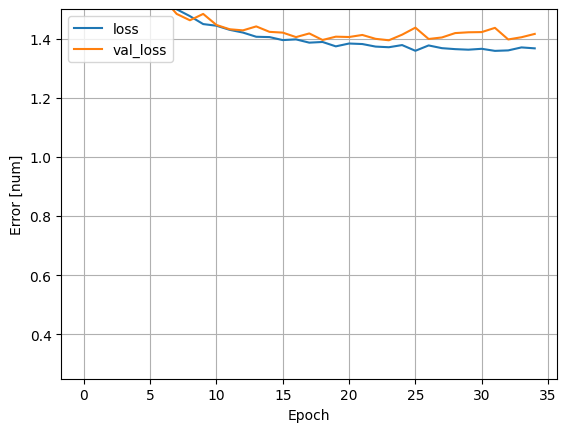

In [ ]:
plot_loss(history1)

In [ ]:
test_results = {}
test_lables_in_classes2 = to_categorical(log_test_labels,nb_classes )

test_results['oldpeak-age_model'] = two_feature_model.evaluate(
    log_test_features[['oldpeak','age']],
    test_lables_in_classes2 , verbose=1)

19/19 [==============================] - 0s 4ms/step - loss: 1.3629 - accuracy: 0.4763


In [ ]:
test_pred2 = two_feature_model.predict(log_test_features[['oldpeak','age']])
preds_classes2 = np.argmax(test_pred2, axis=-1)
preds_classes2

19/19 [==============================] - 0s 2ms/step


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 4, 0, 0, 4, 0, 0, 1, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 4, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 4, 0, 1, 0, 0, 1, 1, 4, 0, 0, 1, 0, 4, 0, 0, 0, 4, 0,
       0, 4, 0, 4, 0, 0, 4, 0, 0, 1, 0, 0, 3, 3, 1, 0, 4, 0, 0, 0, 1, 0,
       0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0,
       0, 4, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 4, 0, 0,

In [ ]:
cm = metrics.confusion_matrix(log_test_labels, preds_classes2)

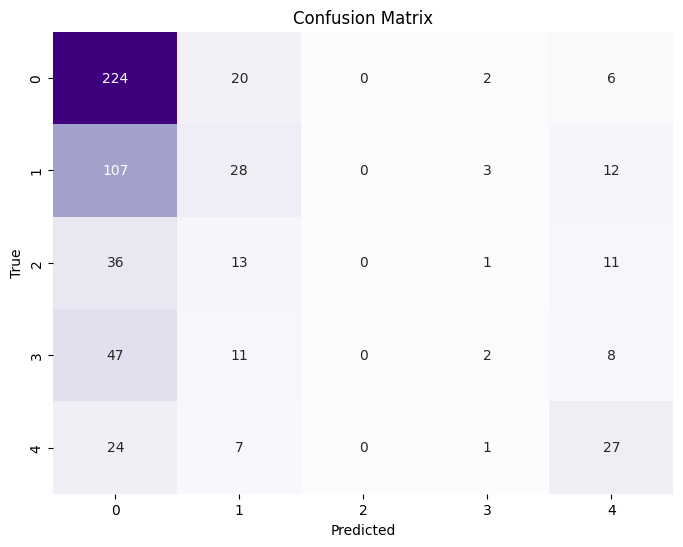

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Model Architecture 2

In [ ]:
modelLG = LogisticRegression(fit_intercept=False, class_weight='balanced', random_state=0, multi_class="multinomial", solver='newton-cg', max_iter=500)    # for class imbalance
modelLG.fit(log_train_features, log_train_labels )

LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=500,
                   multi_class='multinomial', random_state=0,
                   solver='newton-cg')

In [ ]:
lg_labels_pred = modelLG.predict(log_test_features)

In [ ]:
report = classification_report(log_test_labels, lg_labels_pred, output_dict = True)
label_0 = report['0']
label_0

{'precision': 0.6278195488721805,
 'recall': 0.6626984126984127,
 'f1-score': 0.6447876447876447,
 'support': 252}

In [ ]:
label_1 = report['1']
label_1

{'precision': 0.2903225806451613,
 'recall': 0.12,
 'f1-score': 0.169811320754717,
 'support': 150}

In [ ]:
label_2 = report['2']
label_2

{'precision': 0.16666666666666666,
 'recall': 0.01639344262295082,
 'f1-score': 0.02985074626865672,
 'support': 61}

In [ ]:
label_3 = report['3']
label_3

{'precision': 0.19491525423728814,
 'recall': 0.3382352941176471,
 'f1-score': 0.24731182795698922,
 'support': 68}

In [ ]:
label_4 = report['4']
label_4

{'precision': 0.2463768115942029,
 'recall': 0.576271186440678,
 'f1-score': 0.34517766497461927,
 'support': 59}

In [ ]:
accuracy = report['accuracy']
accuracy

0.411864406779661

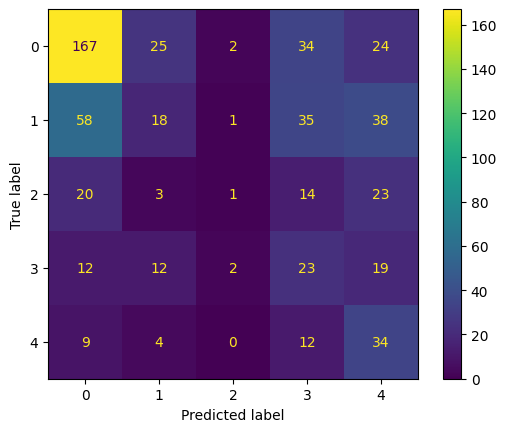

In [ ]:
cm = confusion_matrix(log_test_labels, lg_labels_pred, labels=modelLG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelLG.classes_)
disp.plot()
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 3000, max_features = "log2", bootstrap = True, random_state = 0, class_weight="balanced", criterion="gini" )
rf.fit(RF_features_train, RF_labels_train)
RF_labels_pred = rf.predict(RF_features_test)

In [ ]:
print(RF_labels_pred[:10])
print(RF_labels_test.to_numpy(dtype=object)[:10])

[1 0 2 0 0 0 0 0 0 0]
[1 0 0 3 0 0 0 3 0 0]


[[102  10   6   1   1]
 [ 29  40   7   1   1]
 [  9  12   4   8   3]
 [  6  10   4   9   4]
 [  0   0   0   0  31]]


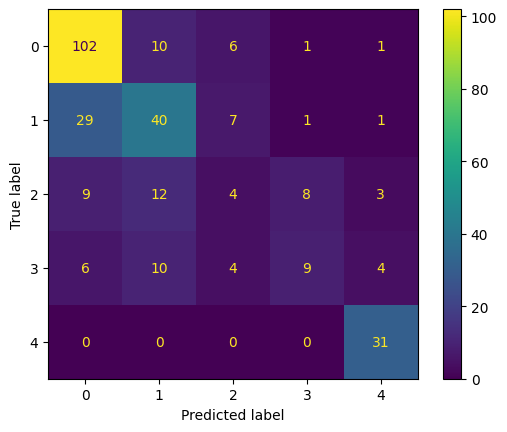

In [ ]:
print(metrics.confusion_matrix(RF_labels_test, RF_labels_pred))
plt2 = metrics.ConfusionMatrixDisplay.from_estimator(rf, RF_features_test, RF_labels_test)
plt.grid(False)

In [ ]:
importance = rf.feature_importances_

names = features.columns.to_numpy(dtype=object)

importanceDF = pd.DataFrame({'names':names, 'importance':importance})

<Axes: title={'center': 'Feature importance'}, ylabel='names'>

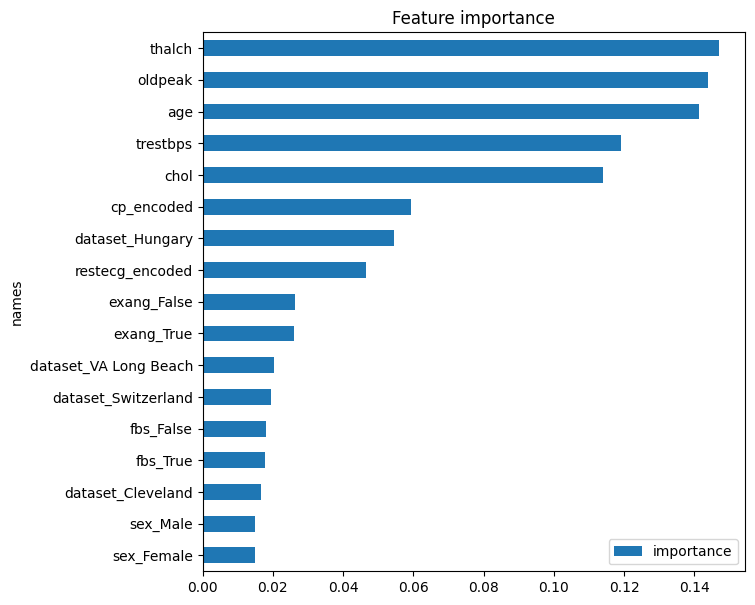

In [ ]:
importanceDF = importanceDF.sort_values(by=['importance'])

importanceDF.plot.barh(x='names', y='importance', figsize = (7,7), title = "Feature importance")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

RF_accuracy = accuracy_score(RF_labels_test, RF_labels_pred)
print("Accuracy: %.2f%%" % (RF_accuracy*100))
print("Accuracy: %.1f%%" % (RF_accuracy*100))
print("Accuracy: %.3f%%" % (RF_accuracy*100))

RF_recall = recall_score(RF_labels_test, RF_labels_pred, average='micro')
print("Recall: %.2f%%" % (RF_recall*100))
print("Recall: %.1f%%" % (RF_recall*100))
print("Recall: %.3f%%" % (RF_recall*100))

RF_precision = precision_score(RF_labels_test, RF_labels_pred, average='micro')
print("Precision: %.2f%%" % (RF_precision*100))
print("Precision: %.1f%%" % (RF_precision*100))
print("Precision: %.3f%%" % (RF_precision*100))

Accuracy: 62.42%
Accuracy: 62.4%
Accuracy: 62.416%
Recall: 62.42%
Recall: 62.4%
Recall: 62.416%
Precision: 62.42%
Precision: 62.4%
Precision: 62.416%


## Gradient Boosted Tree

In [ ]:
#Create a Gradient Boosted Tree
gbt = XGBClassifier(seed = 0, eval_metric="mlogloss", max_depth=6, learning_rate=0.5, n_estimators=2000)

In [ ]:
# Extracting validation data from training data
X_train, X_valid, Y_train, Y_valid = train_test_split(GBT_features_train, GBT_labels_train, test_size=0.2, random_state=0)

# Validation set
validation_set = [(X_train,Y_train),(X_valid, Y_valid)]

# Train a gradient Boosted Tree with validation data
gbt.fit(GBT_features_train, GBT_labels_train , eval_set = validation_set)

[0]	validation_0-mlogloss:1.54925	validation_1-mlogloss:1.55284
[1]	validation_0-mlogloss:1.49439	validation_1-mlogloss:1.50339
[2]	validation_0-mlogloss:1.44305	validation_1-mlogloss:1.45631
[3]	validation_0-mlogloss:1.39571	validation_1-mlogloss:1.41299
[4]	validation_0-mlogloss:1.35133	validation_1-mlogloss:1.37065
[5]	validation_0-mlogloss:1.31052	validation_1-mlogloss:1.33179
[6]	validation_0-mlogloss:1.27251	validation_1-mlogloss:1.29501
[7]	validation_0-mlogloss:1.23714	validation_1-mlogloss:1.26117
[8]	validation_0-mlogloss:1.20515	validation_1-mlogloss:1.23062
[9]	validation_0-mlogloss:1.17400	validation_1-mlogloss:1.20002
[10]	validation_0-mlogloss:1.14389	validation_1-mlogloss:1.17321
[11]	validation_0-mlogloss:1.11594	validation_1-mlogloss:1.14729
[12]	validation_0-mlogloss:1.08881	validation_1-mlogloss:1.12255
[13]	validation_0-mlogloss:1.06341	validation_1-mlogloss:1.09811
[14]	validation_0-mlogloss:1.03929	validation_1-mlogloss:1.07637
[15]	validation_0-mlogloss:1.01587	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# creating a list of all the trees created
gbt_treelist = gbt.get_booster().get_dump()
# Getting total amount of trees from XGboost Classifier model
print(len(gbt_treelist))

5000


visualizing the GBT

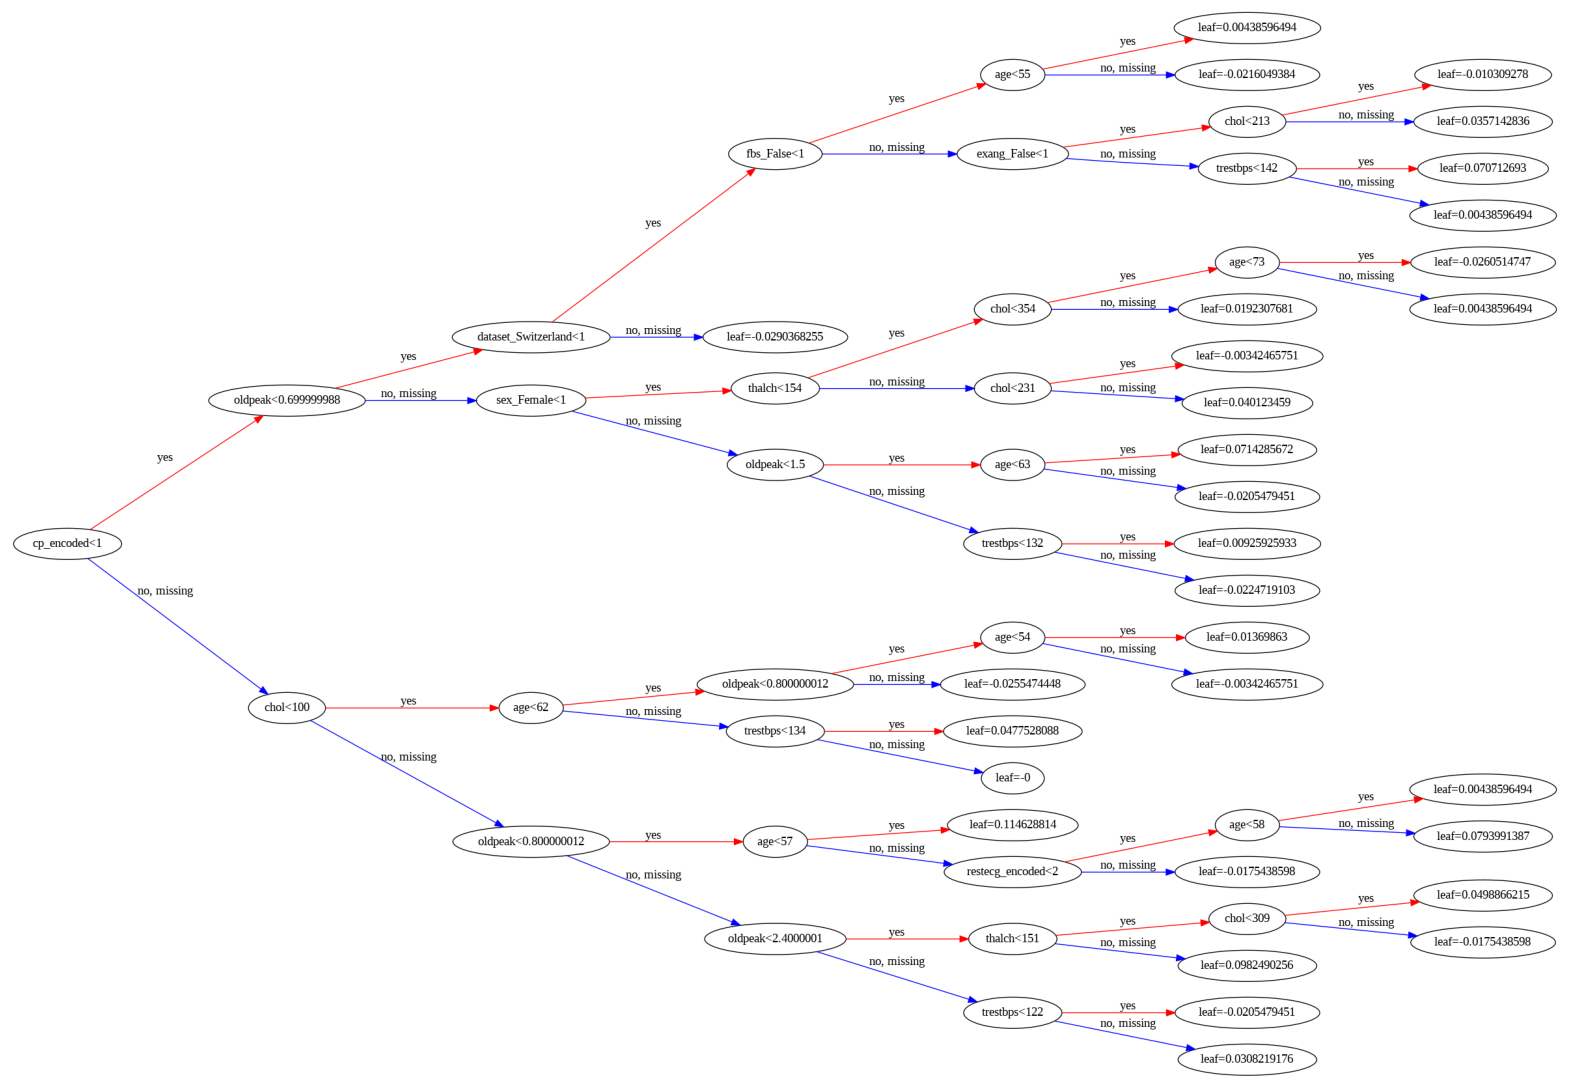

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
xgb.plot_tree(gbt, num_trees=0, ax=ax, rankdir="LR")
plt.show()

Evaluate

In [ ]:
#Predict the response for test dataset
GBT_labels_pred = gbt.predict(GBT_features_test)

# Look at the predicted values.
print(GBT_labels_pred[:10])
#Compare with the real data from the test data set.
print(GBT_labels_test[:10])

[4 0 3 1 0 0 0 0 0 0]
819    1
721    0
31     0
641    3
372    0
416    0
386    0
231    3
787    0
704    0
Name: num, dtype: int64


In [ ]:
# getting the probabilities predicted for each class
preds_proba = gbt.predict_proba(GBT_features_test)
print(preds_proba)

[[1.5972346e-01 3.4762025e-01 3.6085550e-02 3.4757063e-03 4.5309499e-01]
 [9.9951494e-01 3.9354236e-05 4.2869075e-04 6.5092750e-06 1.0458111e-05]
 [1.0564838e-04 7.7020358e-03 3.4267178e-01 6.1218464e-01 3.7335873e-02]
 ...
 [8.8065344e-01 1.0148415e-01 1.1130093e-02 5.3383061e-03 1.3940326e-03]
 [1.6869001e-04 6.0203285e-03 2.6257886e-04 9.2563551e-04 9.9262273e-01]
 [2.2928627e-01 3.7028095e-01 3.3783894e-02 2.8749771e-02 3.3789912e-01]]


[[97 16  4  1  2]
 [28 39  5  4  2]
 [ 7 13  4  8  4]
 [ 5 10  4 10  4]
 [ 0  0  0  0 31]]


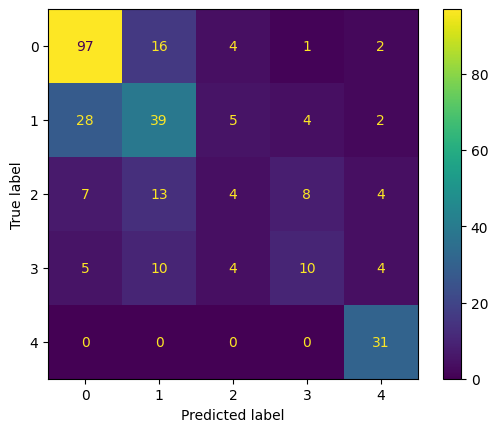

In [ ]:
#Let's visualize how well the GBT does.
print(metrics.confusion_matrix(GBT_labels_test, GBT_labels_pred))
plt2 = metrics.ConfusionMatrixDisplay.from_estimator(gbt, GBT_features_test, GBT_labels_test)
plt.grid(False)

In [ ]:
accuracy = accuracy_score(GBT_labels_test, GBT_labels_pred)
print("Accuracy: %.1f%%" % (accuracy * 100))

Accuracy: 60.7%


## Neural Network

In [ ]:
num_features = 16
num_classes = 5
train_cat_y = to_categorical(y_train,num_classes )
test_cat_y = to_categorical(y_test, num_classes)

NameError: ignored

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(128, input_dim=num_features, activation='relu'))
NN_model.add(Dropout(0.3))
NN_model.add(Dense(64, activation='log_softmax'))
NN_model.add(Dropout(0.3))

NN_model.add(Dense(32, activation='log_softmax'))
NN_model.add(Dropout(0.3))

NN_model.add(Dense(16, activation='log_softmax'))
NN_model.add(Dropout(0.3))


NN_model.add(Dense(num_classes, activation='log_softmax'))

In [ ]:
NN_model.compile(
    optimizer= tf.optimizers.Adam(learning_rate=0.01), # optimizer Adam
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    )
NN_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2176      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 16)               

In [ ]:
NN_history = NN_model.fit(X_train, train_cat_y, epochs=25, batch_size=32, validation_split=0.2)


NameError: ignored

In [ ]:
plot_loss(NN_history)

In [ ]:
NN_eval = NN_model.evaluate(X_test, test_cat_y)
print(NN_eval)


In [ ]:
NN_pred = NN_model.predict(X_test)
preds_classes = np.argmax(NN_pred, axis=-1)
print(preds_classes)
cm = metrics.confusion_matrix( y_test, preds_classes)

In [ ]:
print(classification_report(y_test, preds_classes))